

# Project: The movies data analysis 
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Dataset Description:
This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue.
in this project I will analyse the successful movies data, in detail I will be foucing in discover the trends and what indecators that makes the movie's success.

### Questions to answer:

* What is the most commen genre in the dataset?
* What genre has most popularity?
* What movie has the lowest and highest revenue?
* What movie has the lowest and highest financial gain?
* What is the average budget for a movie?
* Is there a relationship between popularity and revenue?
* Did the highest revenue receive a better vote?
* How much movie are produced each year?
* Which actors associated with high revenue movies?




> ### Variables description:
- id: the id of each cell
- imdb_id: the special id that the imdv gave to the movie 
- popularity: the condition of being liked, admired, by people.
- budget: the money to make the movie
- revenue: the revenue that the movie make
- original_title: the name of the movie 
- cast: name of the cast of the movie separated by “|”
- homepage: the webpage of the movie
- director: name of the directors of the movie separated by “|”
- tagline: Unknown 
- keywords: the keyword involved or describe the movie 
- overview: little description of the movie
- runtime: the length of time a movie takes to run.
- genres: the type of the movie
- production_companies: name of the production_companies of the movie separated by “|”
- release_date: the exact date to release the movie 
- vote_count: how many people vote for the movie
- vote_average: unknown          
- release_year: the year that the movie released in
- budget_adj: show the budget  the associated movie in terms of 2010 dollars
- revenue_adj:show the revenue  the associated movie in terms of 2010 dollars

In [112]:
# import all the necessary
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

> Data wrangling is the process of cleaning and unifying messy and complex data sets for easy access and analysis.

### General Properties

In [113]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [114]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [115]:
df.shape

(10866, 21)

In [116]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


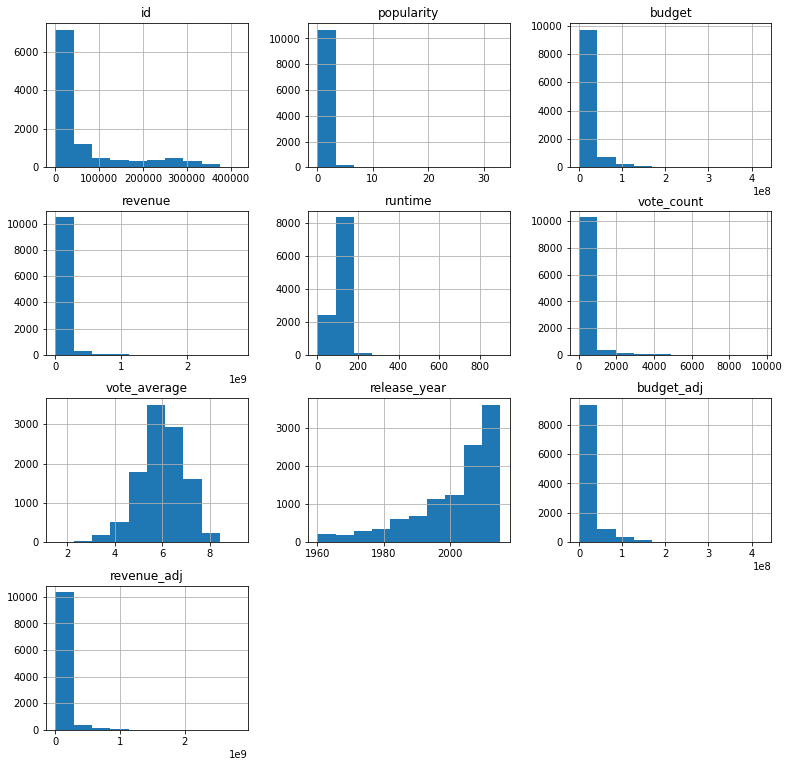

In [117]:
df.hist(figsize=(13,13));

In [118]:
df.duplicated().sum()

1

 ###### After I inspect the dataset I notice some problems with some columns first there is unnecessary columns that will not benefit the analysis in any form, and I decide to drop it. However, the unnecessary columns are the following:
 
 * imdb_id 
 * homepage
 * tagline
 * keywords
 * overview
 * release_date
 * runtime
 
 

###### second problem is there is some rows include multiple values separated by "|"  it must be fix it, and this rows is:

* cast
* director
* genres
* production_companies

###### based on the incpection I did via the histograms and the describe method the third problem is some columns contain zeros "0" as a value, so in order to come up with an appropriate analysis i will change the value to "NaN" and the drop the null values. However, the values are the following:

* budget
* revenue
* budget_adj
* revenue_adj







### Data Cleaning 

>  In this section, I will clean the dataset and fix the problems that I found in the previous section to preform an appropriate analysis. 
>  Firstly, I will change the zeros to "NaN" to delete it easily, Secondly, I will fix the rows that has multiple values and finally, i will drop the unnecessary columns.

In [119]:
# change the zeros to NaN

df['budget'].replace(0, np.NAN, inplace=True)
df['revenue'].replace(0, np.NAN, inplace=True)
df['budget_adj'].replace(0, np.NAN, inplace=True)
df['revenue_adj'].replace(0, np.NAN, inplace=True)

df.dropna(axis=0, inplace=True)

In [120]:
# to make sure there is no null value 
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [121]:
# split up the columns with multiple values into other columns 
df_cast = (df['cast'].str.split('|', expand=True).rename(columns=lambda x: F"cast_{x+1}"))
# check the result 
df_cast.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 0 to 10760
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast_1  1287 non-null   object
 1   cast_2  1285 non-null   object
 2   cast_3  1285 non-null   object
 3   cast_4  1283 non-null   object
 4   cast_5  1278 non-null   object
dtypes: object(5)
memory usage: 60.3+ KB


In [122]:
# continue spliting the other columns 
df_director = (df['director'].str.split('|', expand= True).rename(columns= lambda x: f"director_{x+1}"))
df_genres = (df['genres'].str.split('|', expand= True).rename(columns= lambda x: f"genres_{x+1}"))
df_production = (df['production_companies'].str.split('|', expand= True).rename(columns= lambda x: f"production_companies_{x+1}"))

In [123]:
# merge the the columns I create to the main dataframe 
df = df.join([df_cast, df_director, df_genres, df_production])

In [124]:
# check the number of duplicated values again  
df.duplicated().sum()

0

In [125]:
# drop the unnecessary columns 
df = df.drop(['imdb_id' , 'homepage', 'tagline', 'keywords', 'overview', 'release_date', 'runtime', 
'director', 'genres', 'production_companies', 'cast'], axis =1)

In [126]:
# check the dataframe information 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 0 to 10760
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1287 non-null   int64  
 1   popularity              1287 non-null   float64
 2   budget                  1287 non-null   float64
 3   revenue                 1287 non-null   float64
 4   original_title          1287 non-null   object 
 5   vote_count              1287 non-null   int64  
 6   vote_average            1287 non-null   float64
 7   release_year            1287 non-null   int64  
 8   budget_adj              1287 non-null   float64
 9   revenue_adj             1287 non-null   float64
 10  cast_1                  1287 non-null   object 
 11  cast_2                  1285 non-null   object 
 12  cast_3                  1285 non-null   object 
 13  cast_4                  1283 non-null   object 
 14  cast_5                  1278 non-null  

In [127]:
# check the new size of the dataframe after the cleaning
df.shape

(1287, 31)

<a id='eda'></a>
## Exploratory Data Analysis



## Research Question 1 (what is the most commen genre in the dataset?)

In [128]:
# first I will create a dataframe contain only the five genres  
df_genres = df.copy()
df_genres = df_genres.filter(['genres_1','genres_2','genres_3', 'genres_4', 'genres_5'], axis=1)
# check it's done correctly 
df_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 0 to 10760
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   genres_1  1287 non-null   object
 1   genres_2  1092 non-null   object
 2   genres_3  722 non-null    object
 3   genres_4  270 non-null    object
 4   genres_5  83 non-null     object
dtypes: object(5)
memory usage: 92.6+ KB


In [129]:
# use melt function to change the dataframe from wide to long.
# in other word I used melt to make one columns an identifier variables, while all other columns, considered measured variables.

df_genres = df_genres.melt()
# I used crosstab to build cross-tabulation table that can show the frequency with genres 
df1 = pd.crosstab(index=df_genres['value'], columns=df_genres['variable'])
df1

variable,genres_1,genres_2,genres_3,genres_4,genres_5
value,,,,,
Action,238,119,47,8,3
Adventure,130,97,52,13,5
Animation,55,33,15,4,1
Comedy,230,113,41,25,5
Crime,52,68,54,17,2
Documentary,14,1,0,0,0
Drama,274,172,77,9,3
Family,19,49,54,32,9
Fantasy,44,57,29,16,8


In [131]:
# combin the total frequency 
df1['total_freq'] = df1['genres_1'] + df1['genres_2'] + df1['genres_3'] + df1['genres_4']+ df1['genres_5']
# sort it to facilitate the visualization
df1 = df1.sort_values(by=['total_freq'], ascending=False)
df1

variable,genres_1,genres_2,genres_3,genres_4,genres_5,total_freq
value,,,,,,
Drama,274,172,77,9,3,535
Action,238,119,47,8,3,415
Comedy,230,113,41,25,5,414
Thriller,58,130,144,54,13,399
Adventure,130,97,52,13,5,297
Science Fiction,38,48,74,35,14,209
Romance,26,88,57,18,7,196
Crime,52,68,54,17,2,193
Family,19,49,54,32,9,163


Text(0.5, 1.0, 'Most common genres')

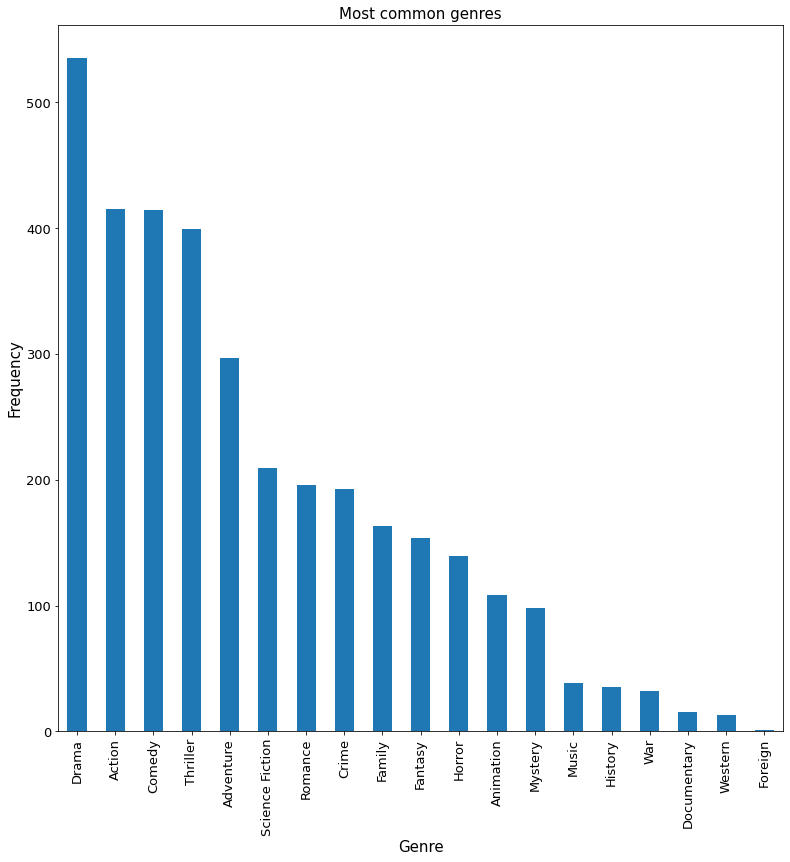

In [133]:
# create a bar chart to visualize the most common genres
df1['total_freq'].plot(kind="bar", figsize=(13,13), fontsize= 13)
plt.xlabel('Genre', fontsize= 15)
plt.ylabel('Frequency', fontsize= 15)
plt.title('Most common genres', fontsize= 15)


> ### From this chart we could observe that the Drama movies is the most common genre in our dataset. then after Drama there is Action and then Comedy.  

## Research Question 2  (What genre has most popularity?)

In [134]:
# I will pull the top 50 popularity movies to determine what genre are most popular
top_genre = df.nlargest(50, 'popularity')
top_genre.head()

,id,popularity,budget,revenue,original_title,vote_count,vote_average,release_year,budget_adj,revenue_adj,...,genres_1,genres_2,genres_3,genres_4,genres_5,production_companies_1,production_companies_2,production_companies_3,production_companies_4,production_companies_5
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,5562,6.5,2015,1.379999e+08,1.392446e+09,...,Action,Adventure,Science Fiction,Thriller,None,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,6185,7.1,2015,1.379999e+08,3.481613e+08,...,Action,Adventure,Science Fiction,Thriller,None,Village Roadshow Pictures,Kennedy Miller Productions,None,None,None
629,157336,24.949134,165000000.0,6.217525e+08,Interstellar,6498,8.0,2014,1.519800e+08,5.726906e+08,...,Adventure,Drama,Science Fiction,None,None,Paramount Pictures,Legendary Pictures,Warner Bros.,Syncopy,Lynda Obst Productions
630,118340,14.311205,170000000.0,7.733124e+08,Guardians of the Galaxy,5612,7.9,2014,1.565855e+08,7.122911e+08,...,Action,Science Fiction,Adventure,None,None,Marvel Studios,Moving Picture Company (MPC),Bulletproof Cupid,Revolution Sun Studios,None
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,2480,6.3,2015,1.012000e+08,2.716190e+08,...,Adventure,Science Fiction,Thriller,None,None,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,None


Text(0.5, 1.0, 'Most popular genres')

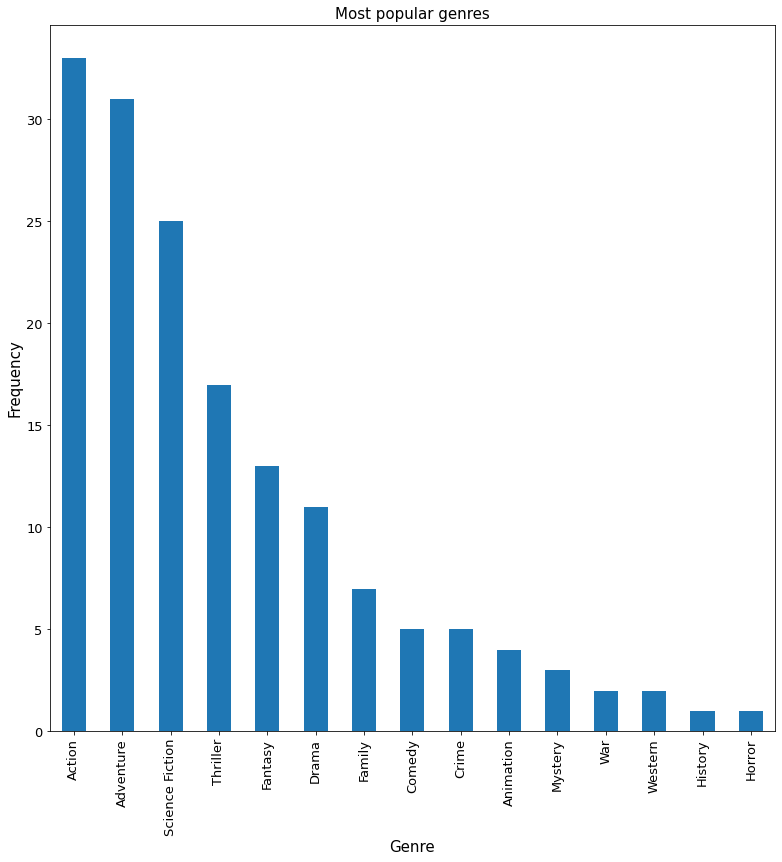

In [155]:
# first I will create a dataframe contain only the five genres  
top_genre_copy = top_genre.copy()
top_genre_copy = top_genre_copy.filter(['genres_1','genres_2','genres_3', 'genres_4', 'genres_5'], axis=1)


top_genre_copy = top_genre_copy.melt()
# I used crosstab to build cross-tabulation table that can show the frequency with genres 
df2 = pd.crosstab(index=top_genre_copy['value'], columns=top_genre_copy['variable'])


# combin the total frequency 
df2['total_freq'] = df2['genres_1'] + df2['genres_2'] + df2['genres_3'] + df2['genres_4']+ df2['genres_5']
# sort it to facilitate the visualization
df2 = df2.sort_values(by=['total_freq'], ascending=False)

# create a bar chart to visualize What genre has most popularity
df2['total_freq'].plot(kind="bar", figsize=(13,13), fontsize= 13)
plt.xlabel('Genre', fontsize= 15)
plt.ylabel('Frequency', fontsize= 15)
plt.title('Most popular genres', fontsize= 15)



> ### From this chart we could see that the Action movies is the most Popular movie type in our dataset. then after Action there is Adventure and then Science Fiction.

## Research Question 3  (what movie has the lowest and highest revenue?)

In [252]:
# bulid a funcation to facilitate the search for maximum and minimum values 

def find_min_max(x):
    # find the min and max index 
    index_min = df[x].idxmin()
    index_max = df[x].idxmax()
    # store it in a dataframe
    min_data = pd.DataFrame(df.loc[min_index,:])
    max_data = pd.DataFrame(df.loc[high_index,:])
   
    
    #print the movie with high and low values
    print("Movie With the Highest "+ x + " is : ",df['original_title'][high_index])
    print("Movie With the Lowest "+ x + " is : ",df['original_title'][min_index])
    # return the information of the movies 
    return pd.concat([min_data,max_data],axis = 1)

In [330]:
find_min_max('revenue')

Movie With the Highest revenue is :  Avatar
Movie With the Lowest revenue is :  Boy


,2398,1386
id,39356,19995
popularity,0.028456,9.432768
budget,3.0,237000000.0
revenue,43.0,2781505847.0
original_title,Boy,Avatar
vote_count,26,8458
vote_average,7.3,7.1
release_year,2010,2009
budget_adj,3.0,240886902.887613
revenue_adj,43.0,2827123750.41189


> ### So, based on the analysis the movie with the lowest revenue is (Boy) and the movie with the highest revenue is (Avatar)

## Research Question 4  (What movie has the lowest and highest financial gain?)

In [331]:
# the equation to calculate the financial gain (profit), is substract the budget from the revenue.
df['profit'] = df['revenue'] - df['budget']
df.head()

,id,popularity,budget,revenue,original_title,vote_count,vote_average,release_year,budget_adj,revenue_adj,...,genres_2,genres_3,genres_4,genres_5,production_companies_1,production_companies_2,production_companies_3,production_companies_4,production_companies_5,profit
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,5562,6.5,2015,1.379999e+08,1.392446e+09,...,Adventure,Science Fiction,Thriller,None,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu,1.363529e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,6185,7.1,2015,1.379999e+08,3.481613e+08,...,Adventure,Science Fiction,Thriller,None,Village Roadshow Pictures,Kennedy Miller Productions,None,None,None,2.284364e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,2480,6.3,2015,1.012000e+08,2.716190e+08,...,Science Fiction,Thriller,None,None,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,None,1.852382e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,5292,7.5,2015,1.839999e+08,1.902723e+09,...,Adventure,Science Fiction,Fantasy,None,Lucasfilm,Truenorth Productions,Bad Robot,None,None,1.868178e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,2947,7.3,2015,1.747999e+08,1.385749e+09,...,Crime,Thriller,None,None,Universal Pictures,Original Film,Media Rights Capital,Dentsu,One Race Films,1.316249e+09


In [255]:
find_min_max('profit')

Movie With the Highest profit is :  Avatar
Movie With the Lowest profit is :  Boy


,2398,1386
id,39356,19995
popularity,0.028456,9.432768
budget,3.0,237000000.0
revenue,43.0,2781505847.0
original_title,Boy,Avatar
vote_count,26,8458
vote_average,7.3,7.1
release_year,2010,2009
budget_adj,3.0,240886902.887613
revenue_adj,43.0,2827123750.41189


> ### As you see here the movie with highest profit is (Avatar) and the movie with lowest profit is (Boy). and its the same result of the question 3 (what movie has the lowest and highest revenue?)

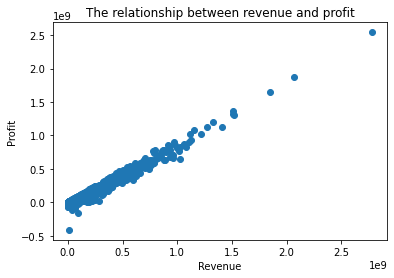

In [347]:
# show the relationship between revenue and profit
data1 = df.revenue.copy()
data2= df.profit.copy()
plt.scatter(data1, data2)
plt.title('The relationship between revenue and profit')
plt.xlabel('Revenue')
plt.ylabel('Profit');
plt.show()

> This chart shows that there is a positive correlation between revenue and profit.

## Research Question 5  (What is the average budget for a movie?)

In [256]:
df['budget'].mean()

52003492.35198135

> ### The average budget for the movies is: 52003492.35 Dollars 

## Research Question 6  (Is there a relationship between popularity and revenue?)


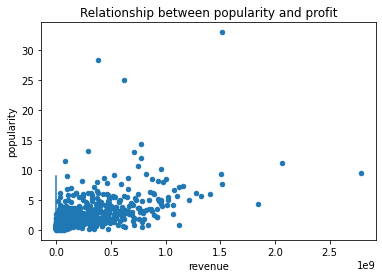

In [332]:
df.plot(x="revenue", y="popularity", kind="scatter");
plt.title('Relationship between popularity and profit')
plt.plot(range(0, 10))

> ### The relationship between the revenue and popularity it's a weak positive correlation which means the relationship is not very strong. 

## Research Question 7  (Did the highest revenue receive a better vote?)

In [288]:
# get the median of revenue 
df.revenue.median()

82087155.0

In [290]:
# select samples with less revenue than the median
low_revenue = df.query('revenue < 82087155.0')

# select samples with greater revenue than the median
high_revenue = df.query('revenue >= 82087155.0')

# ensure these queries included each sample exactly once
num_samples = df.shape[0]
num_samples == low_revenue['vote_average'].count() + high_revenue['vote_average'].count() # should be True


True

In [297]:
# get mean vote average rating for the low revenue and high revenue groups
low_mean = low_revenue.vote_average.mean()
high_mean = high_revenue.vote_average.mean()
# print the result
low_mean, high_mean

(6.113374805598757, 6.4453416149068365)

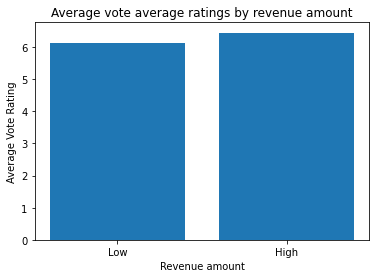

In [298]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [low_mean, high_mean]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average vote average ratings by revenue amount')
plt.xlabel('Revenue amount')
plt.ylabel('Average Vote Rating');

> ### the bar chart indicates that the movies with higher revenue is received more votes 

## Research Question 8  (How much movie are produced each year?)

In [342]:
# print the count of each year in the dataset
df_years = df.release_year.copy()
df_years = df_years.sort_values()
df_years.value_counts()
#df_years.sort_values()

2011    156
2010    132
2009    116
2015     93
2007     92
2012     88
2008     82
2014     70
2006     68
2013     65
2005     51
2004     43
2003     30
2002     24
1999     22
2001     18
2000     14
1996     13
1998     11
1997      8
1995      8
1993      7
1981      6
1992      5
1983      5
1994      5
1990      4
1989      4
1987      4
1971      4
1984      4
1979      4
1982      3
1975      3
1991      2
1978      2
1964      2
1973      2
1977      2
1980      2
1985      2
1988      2
1962      1
1974      1
1972      1
1986      1
1969      1
1967      1
1965      1
1963      1
1961      1
Name: release_year, dtype: int64

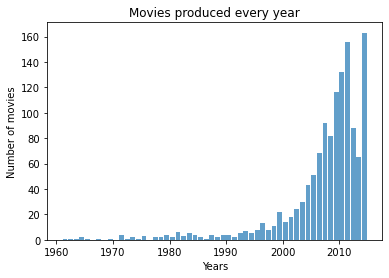

In [336]:
# create a histogram shows the distribution of the movies produced every year
data = df['release_year']

plt.hist(data, bins = np.arange(min(data), max(data) + 1, 1), alpha=0.7, rwidth=0.85)
plt.xlabel('Years')
plt.ylabel('Number of movies')
plt.title('Movies produced every year')
plt.show()

> ### This histogram shows the the amount of movies released each year has been increased over the time. and it shows a drop of released movies in 2012,2013 and it start increasing after this drop.  

## Research Question 9 (Which actors associated with high revenue movies?)

In [233]:
# choose movies with the top 50 revenue
top_rev = df.nlargest(50, 'revenue')

# take only the casts columns 
top_rev_copy = top_rev.copy()
top_rev_copy = top_rev_copy.filter(['cast_1','cast_2','cast_3', 'cast_4', 'cast_5'], axis=1)


top_rev_copy = top_rev_copy.melt()
# I used crosstab to build cross-tabulation table that can show the frequency with genres 
df_rev = pd.crosstab(index=top_rev_copy['value'], columns=top_rev_copy['variable'])


# combin the total frequency 
df_rev['total_freq'] = df_rev['cast_1'] + df_rev['cast_2'] + df_rev['cast_3'] + df_rev['cast_4']+ df_rev['cast_5']
# sort it to facilitate the visualization
df_rev = df_rev.sort_values(by=['total_freq'], ascending=False)

# print the actors that participate in more than 5 movies
most_actors = df_rev.query('total_freq > 3')
most_actors

variable,cast_1,cast_2,cast_3,cast_4,cast_5,total_freq
value,,,,,,
Daniel Radcliffe,6,0,0,0,0,6
Emma Watson,0,1,5,0,0,6
Rupert Grint,0,5,1,0,0,6
Ian McKellen,1,5,0,0,0,6
Orlando Bloom,0,2,0,0,3,5
Ralph Fiennes,0,0,0,4,1,5
Johnny Depp,3,1,0,0,0,4


Text(0.5, 1.0, 'Most appearance actors in the top 50 revenue movies')

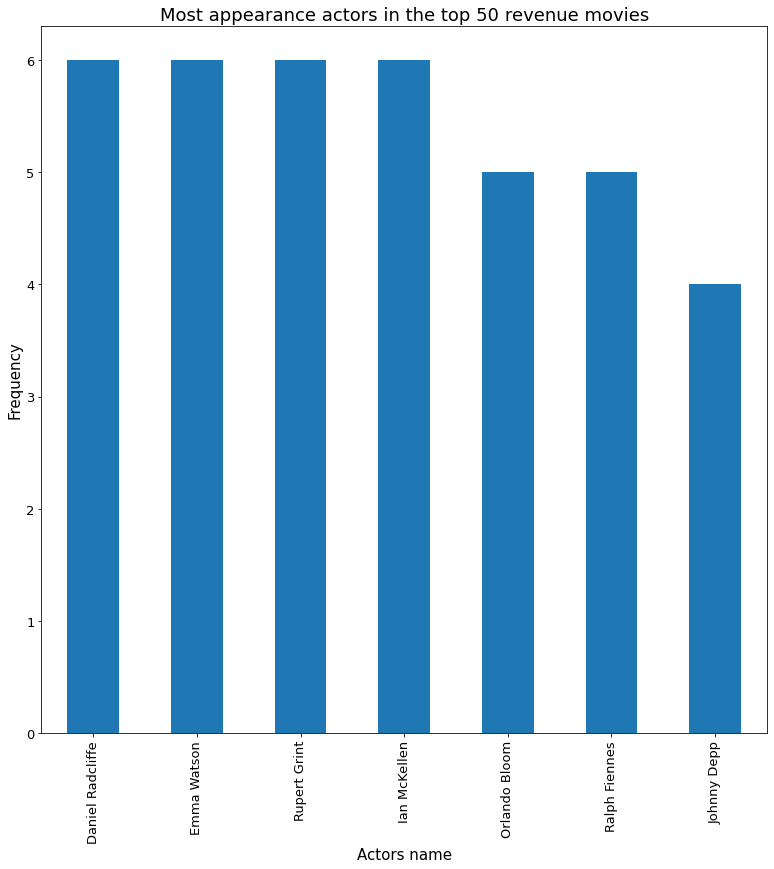

In [329]:
# create a pie chart to visualize what actor has most appearance
most_actors['total_freq'].plot(kind="bar", figsize=(13,13), fontsize= 13)
plt.xlabel('Actors name', fontsize= 15)
plt.ylabel('Frequency', fontsize= 15)
plt.title('Most appearance actors in the top 50 revenue movies', fontsize= 18)


> ### This chart indicate that this actors (Daniel Radcliffe, Emma Watson, Rupert Grint, Ian McKellen, Orlando Bloom, Ralph Fiennes, Johnny Depp) are participate in more than 3 high revenue movies. 


<a id='conclusions'></a>
## Conclusions

> #### Finally, the data analysis has result in the following findings:
* I find that the Drama movies is the most common genre in the dataset. Then after Drama there is Action and then Comedy.

* Action movies is the most popular movie type. Then after Action there is Adventure and then Science Fiction.

* Based on the analysis the movie with the lowest revenue is (Boy) and the movie with the highest revenue is (Avatar)

* Also the movie with highest profit is (Avatar) and the movie with lowest profit is (Boy). and its the same result of the question 3 (what movie has the lowest and highest revenue?). Which means if the revenue increase then the profit increase.


* The average budget for the movies is: 52003492.35 Dollars

* The relationship between the revenue and popularity weak relationship. 

* I observe that the movies with higher revenue is received more votes

* The amount of movies released each year has been increased over the time. and it shows a drop of released movies in 2012,2013 and it start increasing after this drop. 

* The actors (Daniel Radcliffe, Emma Watson, Rupert Grint, Ian McKellen, Orlando Bloom, Ralph Fiennes, Johnny Depp) are participate in more than 3 high revenue movies. 




> #### limitations:
The missing values has affect the analysis even though I dropped it.
Moreover, the currency of revenue and budget are to specifed. 

